In [37]:
import pandas as pd
import numpy as np

import datetime
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact
from ipywidgets import IntSlider, FloatSlider, Dropdown, FloatText

In [38]:
shop_DE = pd.read_pickle("shop_de.pkl")
shop_EU = pd.read_pickle("shop_eu.pkl")
el_puente= pd.merge(shop_DE,shop_EU, on="Monat")

In [39]:
el_puente.head(3)

,Monat,Produkt_A_DE,Produkt_B_DE,Produkt_C_DE,Gesamt_DE,Produkt_A_EU,Produkt_B_EU,Produkt_C_EU,Gesamt_EU
0,January,15562.55,14774.46,148945.17,179282.18,1514.91,30370.49,810582.38,842467.78
1,February,14055.57,15176.47,128859.95,158091.99,1495.04,69687.09,1103974.89,1175157.02
2,March,15633.91,18280.33,141602.71,175516.95,1789.00,120368.49,1633087.01,1755244.51


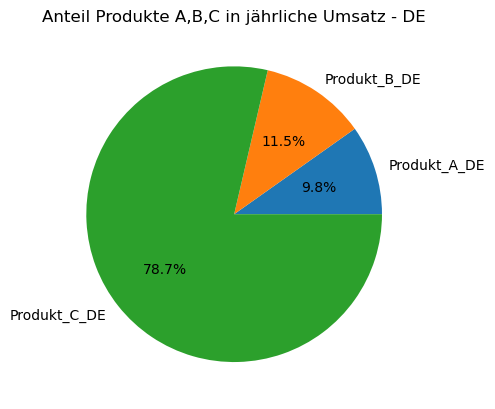

In [40]:
anteil_produkte_DE = el_puente[["Produkt_A_DE", "Produkt_B_DE", "Produkt_C_DE"]].sum()

anteil_produkte_DE.plot.pie(autopct='%1.1f%%')
plt.title("Anteil Produkte A,B,C in jährliche Umsatz - DE")
#plt.ylabel('')
plt.show()

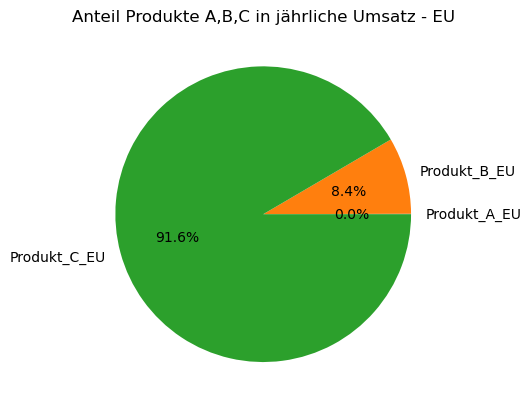

In [41]:
anteil_produkte_EU = el_puente[["Produkt_A_EU", "Produkt_B_EU", "Produkt_C_EU"]].sum()

anteil_produkte_EU.plot.pie(autopct='%1.1f%%')
plt.title("Anteil Produkte A,B,C in jährliche Umsatz - EU")
#plt.ylabel('')
plt.show()


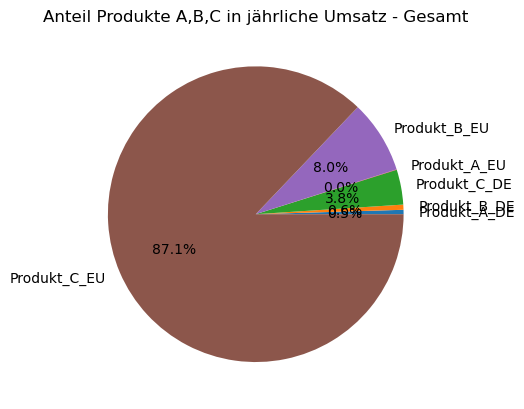

In [42]:
anteil_produkte_Gesamt = el_puente[["Produkt_A_DE", "Produkt_B_DE", "Produkt_C_DE",
                                    "Produkt_A_EU", "Produkt_B_EU", "Produkt_C_EU"]].sum()

anteil_produkte_Gesamt.plot.pie(autopct='%1.1f%%')
plt.title("Anteil Produkte A,B,C in jährliche Umsatz - Gesamt")
#plt.ylabel('')
plt.show()

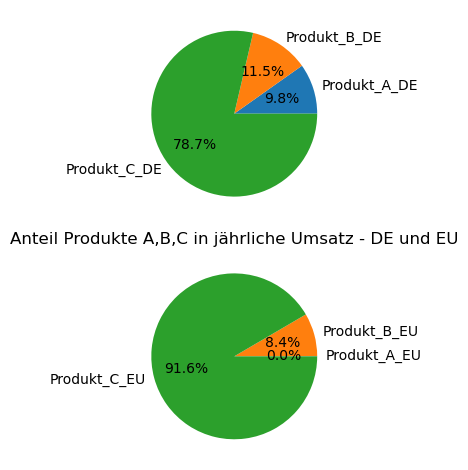

In [43]:
fig, axs = plt.subplots(2, 1, tight_layout=True)

a = anteil_produkte_DE.plot.pie(autopct='%1.1f%%', ax=axs[0], legend=False)
b = anteil_produkte_EU.plot.pie(autopct='%1.1f%%',ax=axs[1], legend=False,)
plt.title("Anteil Produkte A,B,C in jährliche Umsatz - DE und EU")
#c = anteil_produkte_Gesamt.plot.pie(autopct='%1.1f%%',ax=axs[3], legend=False,)

fig.savefig("Produkt Anteile in Umsatz - kreis")


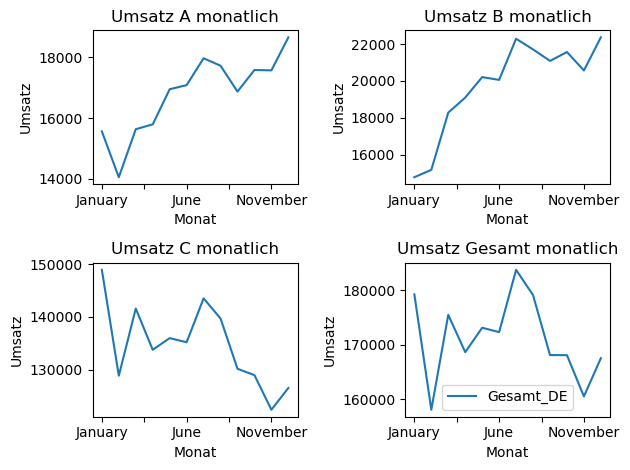

In [44]:
fig, axs = plt.subplots(2, 2, tight_layout=True)

m1 = shop_DE.plot(x="Monat", y="Produkt_A_DE", title="Umsatz A monatlich", 
               xlabel="Monat", ylabel="Umsatz",legend=False, ax=axs[0,0])

m2 = shop_DE.plot(x="Monat", y="Produkt_B_DE", title="Umsatz B monatlich", 
               xlabel="Monat", ylabel="Umsatz",legend=False, ax=axs[0,1])

m3 = shop_DE.plot(x="Monat", y="Produkt_C_DE", title="Umsatz C monatlich", 
               xlabel="Monat", ylabel="Umsatz",legend=False, ax=axs[1,0])

m4 = shop_DE.plot(x="Monat",y="Gesamt_DE", title="Umsatz Gesamt monatlich", 
               xlabel="Monat", ylabel="Umsatz",ax=axs[1,1])

fig.savefig("Umsatz pro Produkt shop_DE")

Jährliche Verkauf: Durchschnitt = 171194, Max = 183785, Min = 183785


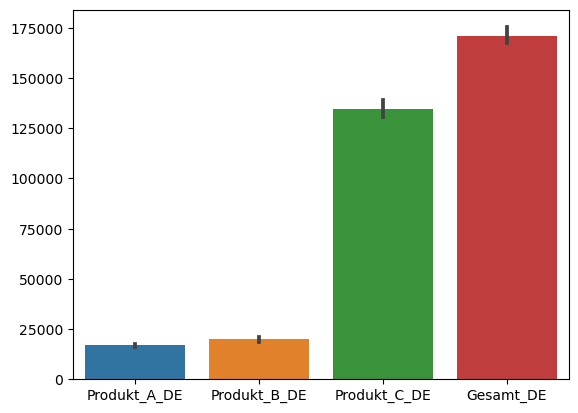

In [57]:
a1 = shop_DE["Gesamt_DE"].mean()
a2 = shop_DE["Gesamt_DE"].max()
a3 = shop_DE["Gesamt_DE"].max()
print(f"Jährliche Verkauf: Durchschnitt = {round(a1)}, Max = {round(a2)}, Min = {round(a3)}")
sns.barplot(shop_DE)
plt.savefig("Produkt Anteile in Umsatz - Bar")